In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn color palette
palette = sns.set_palette('Set2')

In [2]:
data = pd.read_csv('customer_acquisition_data.csv')
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [4]:
data.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


The data has no null values.
There are a total of 800 customer id's.
The ‘channel’ column represents the acquisition channel through which customers were acquired, and it contains categorical data.
The cost- acquisition cost for each customer. Generally speaking, so, the customer acquisition cost would be the total amount of money spent like for example marketing or in sales by total no.of new customers
The ‘conversion_rate’ column represents the conversion rate for each customer.
The ‘revenue’ column represents the revenue generated by each customer

# Distribution of data

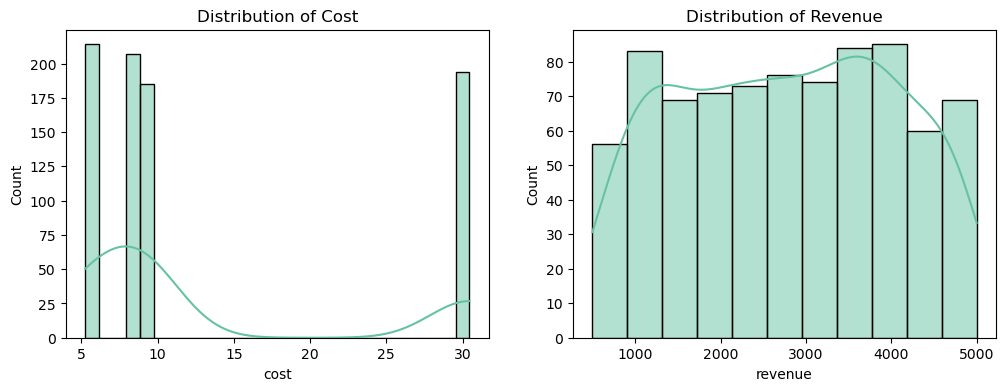

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_title('Distribution of Cost')
sns.histplot(data, x='cost', kde=True, ax=ax1)
ax2.set_title('Distribution of Revenue')
sns.histplot(data, x='revenue', kde=True, ax=ax2);

# compare the cost of acquisition across different channels

<Axes: xlabel='channel', ylabel='cost'>

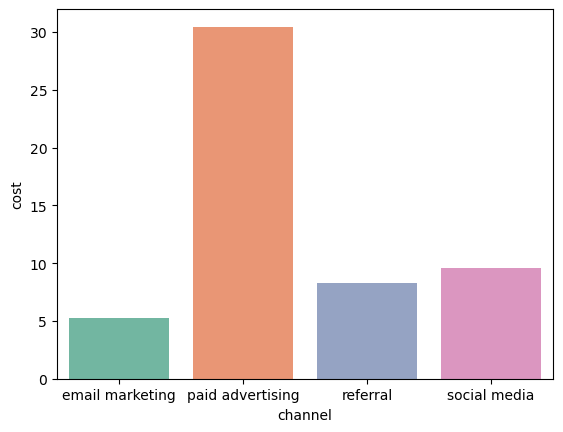

In [19]:
cost_channel=data.groupby('channel')['cost'].mean().reset_index()
sns.barplot(cost_channel, x='channel', y='cost')

Paid Advertising is the most expensive channel and email marketing is the least expensive.

# compare conversion rates across channel's

<Axes: xlabel='channel', ylabel='conversion_rate'>

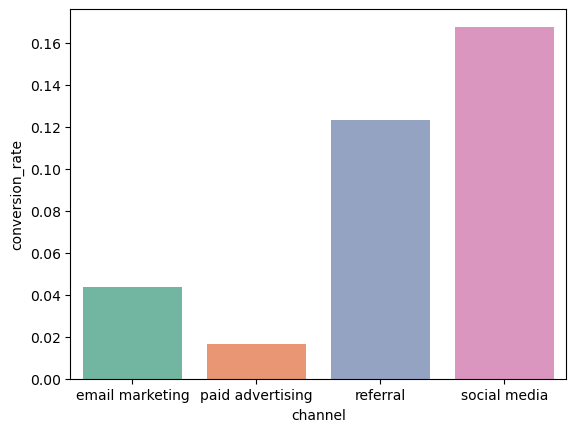

In [21]:
conversionrate_channel=data.groupby('channel')['conversion_rate'].mean().reset_index()
sns.barplot(cost_channel, x='channel', y='conversion_rate')

Social media has the highest average conversion rates. This might be the most successful channel for acquiring customers.

Also though the cost spent on acquiring customers is highest for paid marketing, the conversion rate is too low compared to other channels.
So, paid advertising might require improved targeting strategies to attract customers.

# Compare Revenue across channels

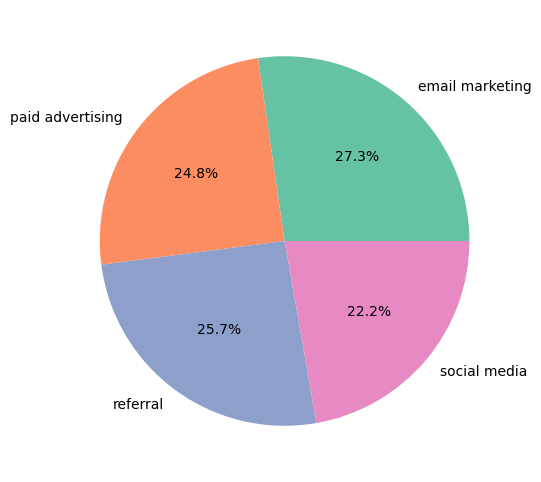

In [23]:
revenue_channel=data.groupby('channel')['revenue'].sum().reset_index()
fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(revenue_channel['revenue'], labels=revenue_channel['channel'], autopct='%1.1f%%');

Email marketing is generating highest revenue, followed by referral. The cost spent by channel for both of these is low compared to other channels.

It implies that allocating resources and focusing efforts on these channels may be beneficial for maximizing revenue generation.

Imp point to note- there is not a huge difference between the revenue's generated across channels. so, we cant yet decide which is the least profitable channel.

# ROI

In [ ]:
Return on investment=net proft/cost
=revenue-cost/cost

In [25]:
data['ROI'] = (data['revenue'] - data['cost']) / data['cost']
data.head()

,customer_id,channel,cost,conversion_rate,revenue,ROI
0,1,referral,8.320327,0.123145,4199,503.667681
1,2,paid advertising,30.450327,0.016341,3410,110.985660
2,3,email marketing,5.246263,0.043822,3164,602.095925
3,4,social media,9.546326,0.167592,1520,158.223564
4,5,referral,8.320327,0.123145,2419,289.733775


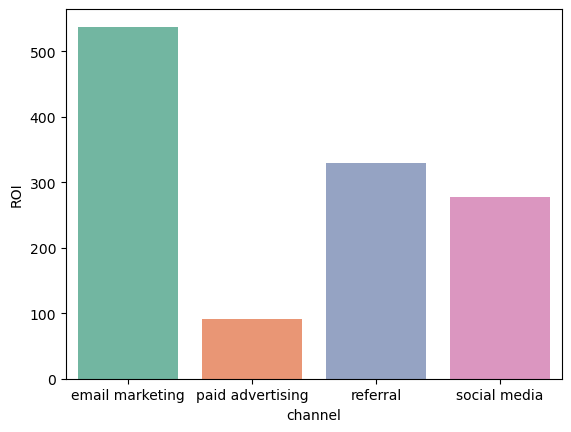

In [27]:
roi_channel = data.groupby('channel')['ROI'].mean().reset_index()

sns.barplot(roi_channel, x='channel', y='ROI');

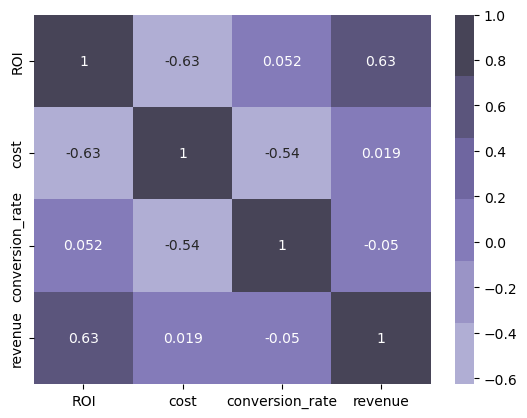

In [29]:
# Computing the correlation matrix
corr = data[['ROI', 'cost', 'conversion_rate', 'revenue']].corr()

sns.heatmap(corr, annot=True, cmap=sns.color_palette('Purples_d'));


ROI has highest correlation with Cost and Revenue. It has positive correlation with Revenue and negative correlation with Cost. 
Email marketing has the highesst ROI. Also, like seen previously, it has the lowest Cost too and highest revenue.

# Customer Lifetime Value (CLTV)

CLTV is total value a customer will generate over the entire duration of their relationship with the company.

In [43]:
data['CLTV'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']
data.head()

,customer_id,channel,cost,conversion_rate,revenue,ROI,cltv,CLTV
0,1,referral,8.320327,0.123145,4199,503.667681,62.024146,62.024146
1,2,paid advertising,30.450327,0.016341,3410,110.985660,1.813671,1.813671
2,3,email marketing,5.246263,0.043822,3164,602.095925,26.385185,26.385185
3,4,social media,9.546326,0.167592,1520,158.223564,26.517043,26.517043
4,5,referral,8.320327,0.123145,2419,289.733775,35.679260,35.679260


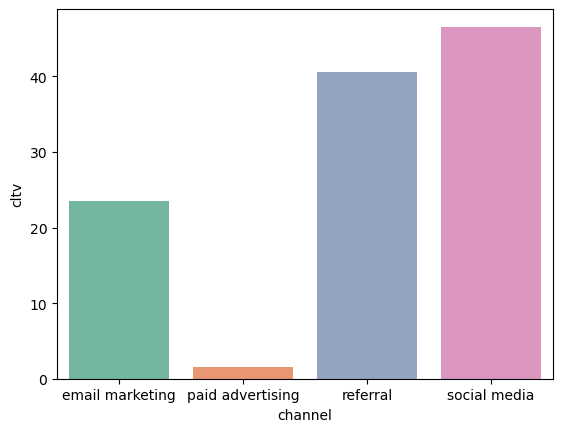

In [45]:
cltv_channel = data.groupby('channel')['cltv'].mean().reset_index()

sns.barplot(cltv_channel, x='channel', y='cltv');

referral and social media channels stand out as the most effective in terms of generating higher customer lifetime value (CLTV). Email marketing also performs reasonably well, while paid advertising lags behind in terms of CLTV.

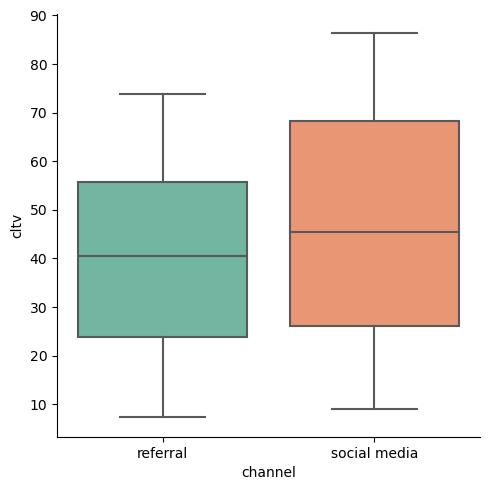

In [46]:
# Selecting records where channel is referral or social media
select = data[data['channel'].isin(['referral', 'social media'])]

sns.catplot(select, x='channel', y='cltv', kind='box');

 social media channel performs the best, but the referral channel is not much worse.